<a href="https://colab.research.google.com/github/alexmrin/Image-deep-learning/blob/main/Convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torchvision.datasets import CIFAR10
from torchvision.transforms import transforms
import torch.nn as nn
from torch.utils.data import random_split, Dataset, DataLoader
from tqdm import tqdm
from torchvision import transforms
import torch.optim as optim
from sklearn.metrics import accuracy_score, f1_score

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
!mkdir data
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

mkdir: cannot create directory ‘data’: File exists


'cuda'

### Import and Process Data

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor()
])

generator = torch.Generator().manual_seed(42)
dataset = CIFAR10(root='/content/data', train=True, transform = transform, download=True)
train_dataset, val_dataset = random_split(dataset, [0.8, 0.2], generator)
test_dataset = CIFAR10(root='./data', train=False, transform = transform, download=False)

Files already downloaded and verified


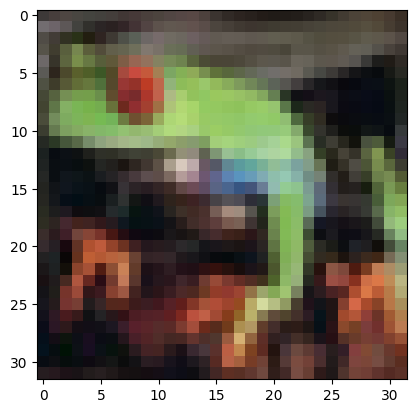

In [ ]:
test_img = train_dataset[0][0]
plt.imshow(test_img.permute(1, 2, 0))

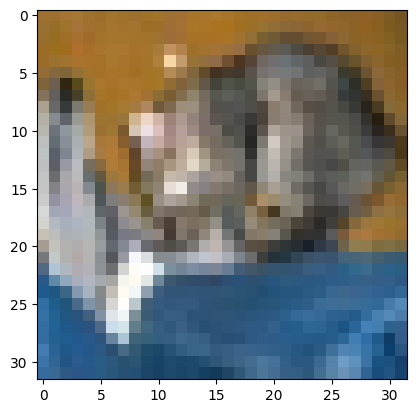

In [ ]:
test_img = test_dataset[0][0]
plt.imshow(test_img.permute(1, 2, 0))

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset))

### Model Creation

In [ ]:
class convnet(nn.Module):
  def __init__(self):
    super().__init__()
    self.features = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(num_features=16),
        nn.ReLU(),

        nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(num_features=16),
        nn.ReLU(),

        nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(num_features=16),
        nn.ReLU(),

        nn.MaxPool2d(kernel_size=2),

        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(num_features=32),
        nn.ReLU(),

        nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(num_features=32),
        nn.ReLU(),

        nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(num_features=32),
        nn.ReLU(),

        nn.MaxPool2d(kernel_size=2),

        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(num_features=64),
        nn.ReLU(),

        nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(num_features=64),
        nn.ReLU(),

        nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(num_features=64),
        nn.ReLU()
    )

    self.fc = nn.Sequential(
        nn.Linear(in_features=64*8*8, out_features=500),
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(in_features=500, out_features=10)
    )

  def forward(self, X):
    features = self.features(X)
    fc = torch.flatten(features, start_dim=1)
    output = self.fc(fc)
    return output

### Training Loop

100%|██████████| 1250/1250 [00:16<00:00, 77.88it/s]


Epoch: 1/10, training loss: 0.04622423838973045, validation loss: 0.0407970123231411


100%|██████████| 1250/1250 [00:14<00:00, 87.02it/s]


Epoch: 2/10, training loss: 0.033502909025549886, validation loss: 0.031605853521823886


100%|██████████| 1250/1250 [00:14<00:00, 85.22it/s]


Epoch: 3/10, training loss: 0.02825495567396283, validation loss: 0.025932220986485482


100%|██████████| 1250/1250 [00:14<00:00, 85.24it/s]


Epoch: 4/10, training loss: 0.024815197471529247, validation loss: 0.02277649430036545


100%|██████████| 1250/1250 [00:15<00:00, 81.29it/s]


Epoch: 5/10, training loss: 0.022382431264966727, validation loss: 0.02108397195339203


100%|██████████| 1250/1250 [00:14<00:00, 86.02it/s]


Epoch: 6/10, training loss: 0.02015761136189103, validation loss: 0.022498715008795262


100%|██████████| 1250/1250 [00:15<00:00, 81.43it/s]


Epoch: 7/10, training loss: 0.018112228820100426, validation loss: 0.02070608961880207


100%|██████████| 1250/1250 [00:14<00:00, 85.53it/s]


Epoch: 8/10, training loss: 0.016459570847079157, validation loss: 0.020385256457328797


100%|██████████| 1250/1250 [00:14<00:00, 87.28it/s]


Epoch: 9/10, training loss: 0.0147373902708292, validation loss: 0.019678811991214754


100%|██████████| 1250/1250 [00:14<00:00, 86.20it/s]


Epoch: 10/10, training loss: 0.013290988223813475, validation loss: 0.020068036705255508


Text(0, 0.5, 'Loss')

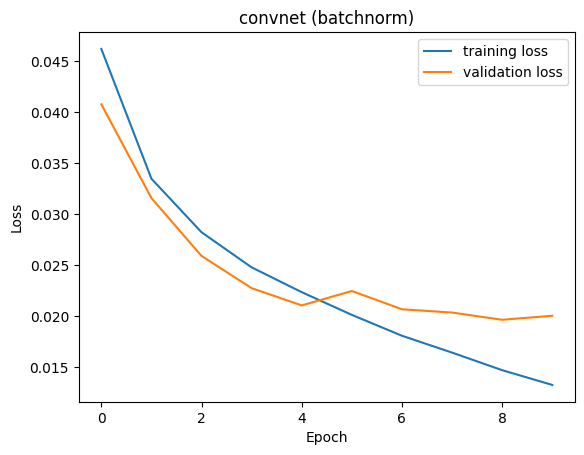

In [ ]:
model = convnet()
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
val_losses = []

num_epochs = 10

# training loop

for epoch in range(num_epochs):
  model.train()

  train_loss = 0
  for images, labels in tqdm(train_loader):
    images, labels = images.to(device), labels.to(device)
    optimizer.zero_grad()
    prediction = model(images)
    loss = criterion(prediction, labels)
    loss.backward()
    optimizer.step()

    train_loss += loss.item()

  train_loss /= len(train_dataset)
  train_losses.append(train_loss)

  model.eval()

  val_loss = 0
  with torch.no_grad():
    for images, labels in val_loader:
      images, labels = images.to(device), labels.to(device)
      prediction = model(images)
      loss = criterion(prediction, labels)

      val_loss += loss.item()

    val_loss /= len(val_dataset)
    val_losses.append(val_loss)

  print(f'Epoch: {epoch+1}/{num_epochs}, training loss: {train_loss}, validation loss: {val_loss}')

sns.lineplot(train_losses, label='training loss')
sns.lineplot(val_losses, label='validation loss')
plt.title('convnet (batchnorm)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# save figure
#plt.savefig('/content/drive/MyDrive/Image Classification/Convnet/convnet_1.png')

### Testing performance

In [ ]:
for images, labels in test_loader:
  images, labels = images.to(device), labels.to(device)
  predictions = model(images)
  predictions = torch.argmax(predictions, dim=1)

predictions = predictions.detach().cpu().numpy()
labels = labels.cpu().numpy()

# evaluation metrics
accuracy = accuracy_score(labels, predictions)
f1_score = f1_score(labels, predictions, average='weighted')

print(f'Accuracy is {accuracy}, F1 score is {f1_score}')

Accuracy is 0.7916, F1 score is 0.790289916555088


In [ ]:
data = pd.Series({'accuracy': accuracy, 'f1_score': f1_score, 'description': 'first benchmark CNN with 10 epochs using 3 conv2d, batchnorm layers, 2 max pooling and dropout p=0.4 on linear'})
#data.to_csv('/content/drive/MyDrive/Image Classification/Convnet/convnet_1.csv')
data

accuracy                                                  0.7916
f1_score                                                 0.79029
description    first benchmark CNN with 10 epochs using 3 con...
dtype: object

In [ ]:
def count_parameters(model):
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total_params, trainable_params

total, trainable = count_parameters(model)
print(f"Total parameters: {total}")
print(f"Trainable parameters: {trainable}")

Total parameters: 2174758
Trainable parameters: 2174758
